In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [35]:
df=pd.read_csv('/Users/ajaychaudhary/Downloads/car data.csv')

In [36]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
df.shape

(301, 9)

In [38]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
df.corr()

/var/folders/03/24l9l0qj75bd3r5zk_j82v6h0000gn/T/ipykernel_1611/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


/var/folders/03/24l9l0qj75bd3r5zk_j82v6h0000gn/T/ipykernel_1611/3040184007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


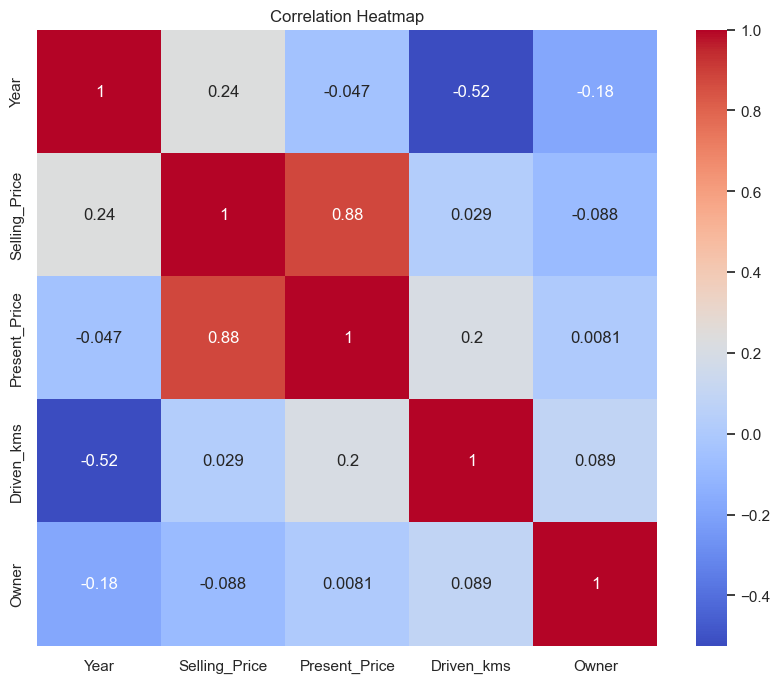

In [41]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
df.duplicated().sum()

2

# EDA

In [43]:

df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [44]:

df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

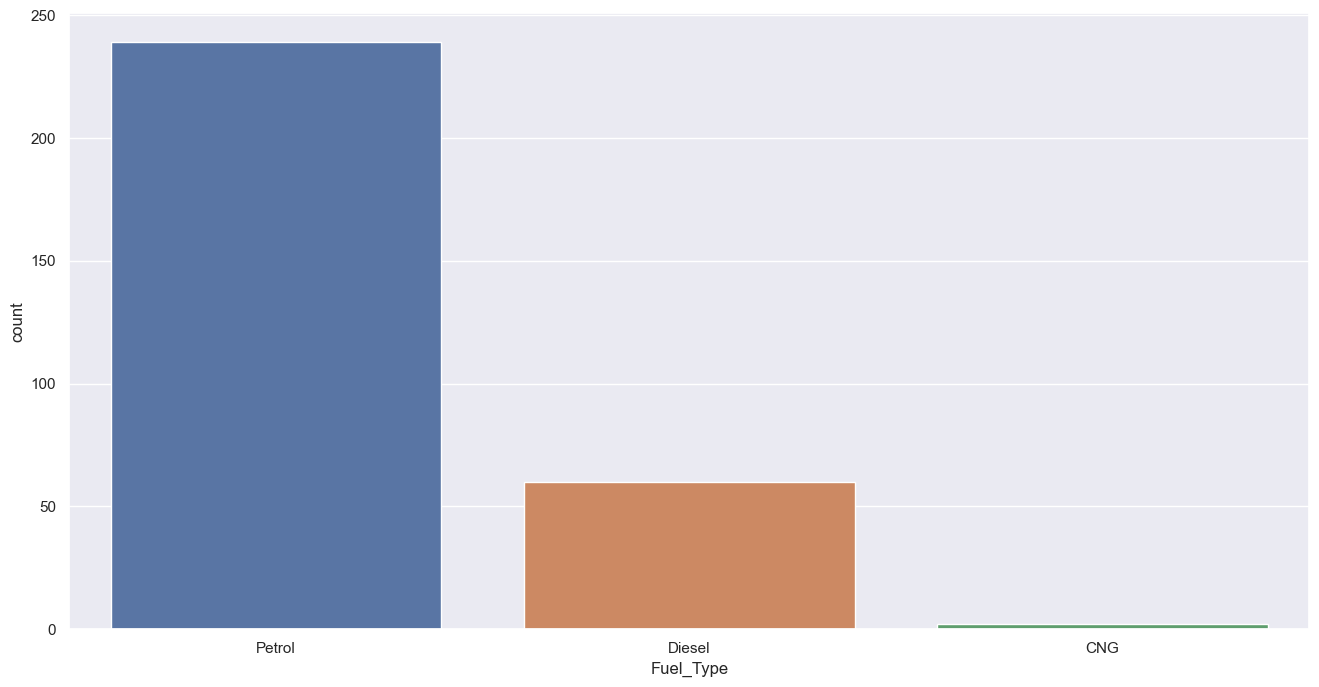

In [45]:
sns.countplot(x='Fuel_Type', data=df)
plt.show()

In [46]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

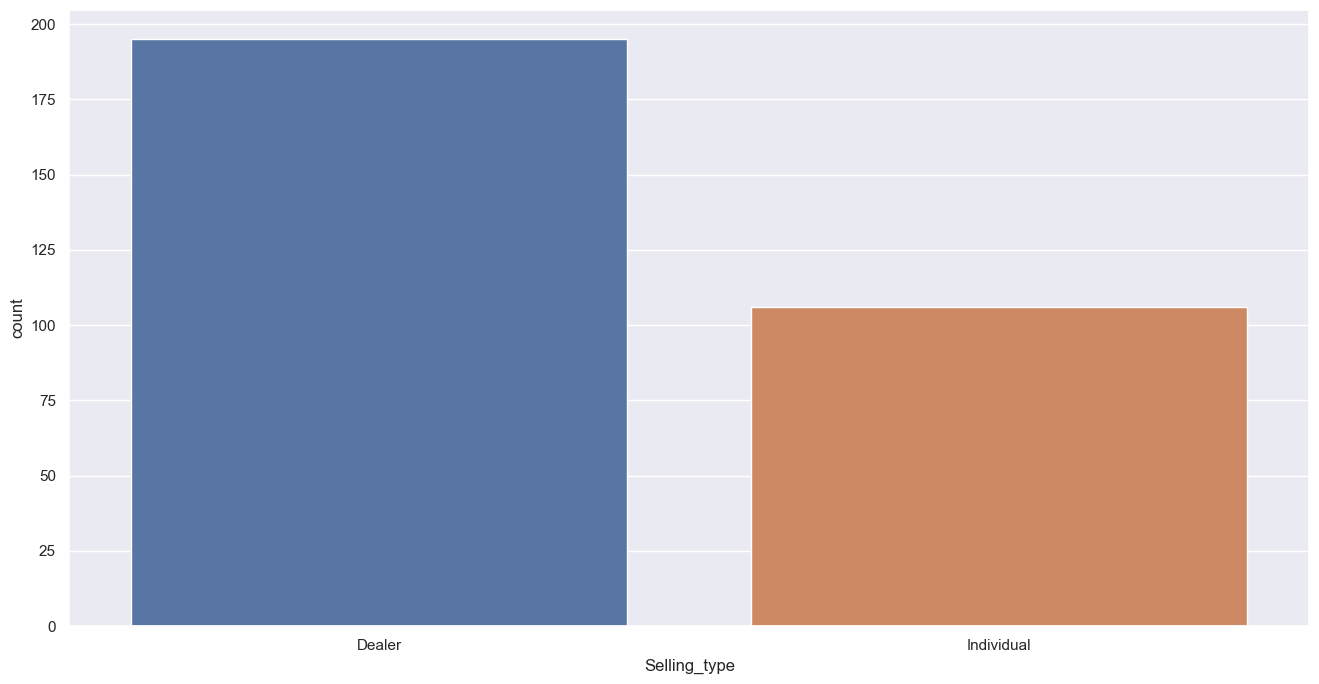

In [47]:
sns.countplot(x='Selling_type', data=df)
plt.show()

In [48]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

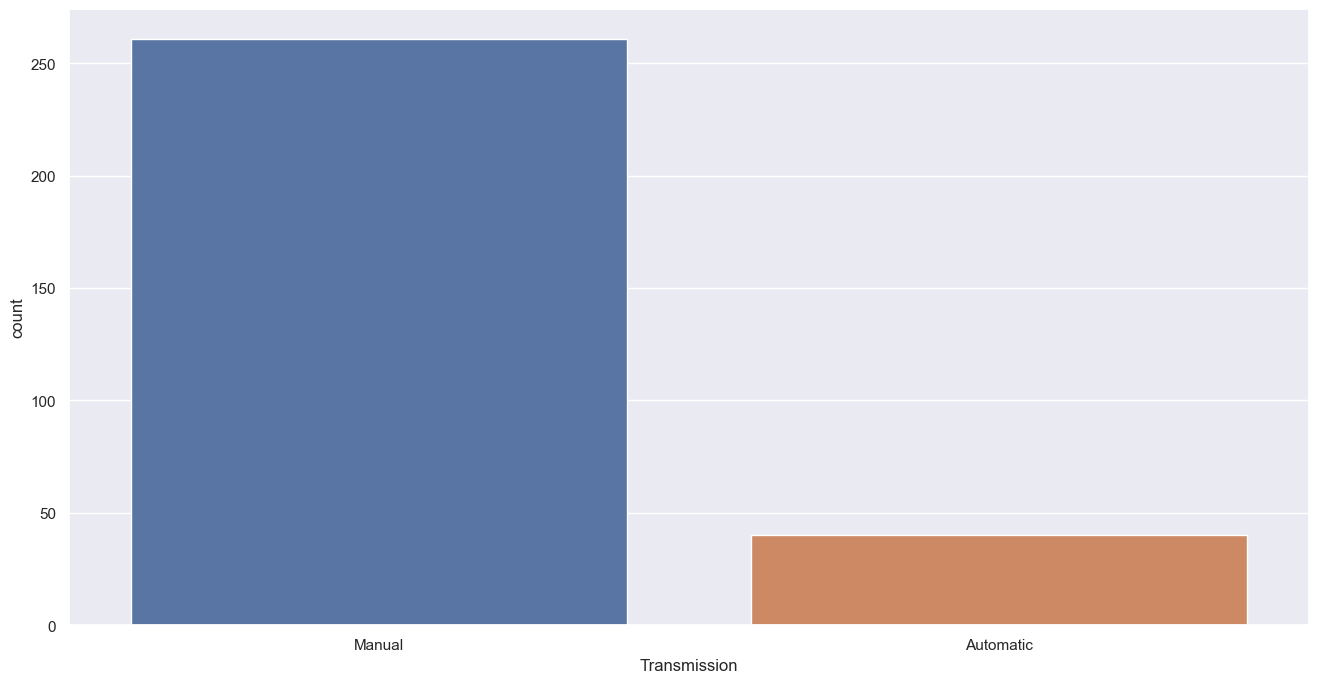

In [49]:
sns.countplot(x='Transmission', data=df)
plt.show()

In [50]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

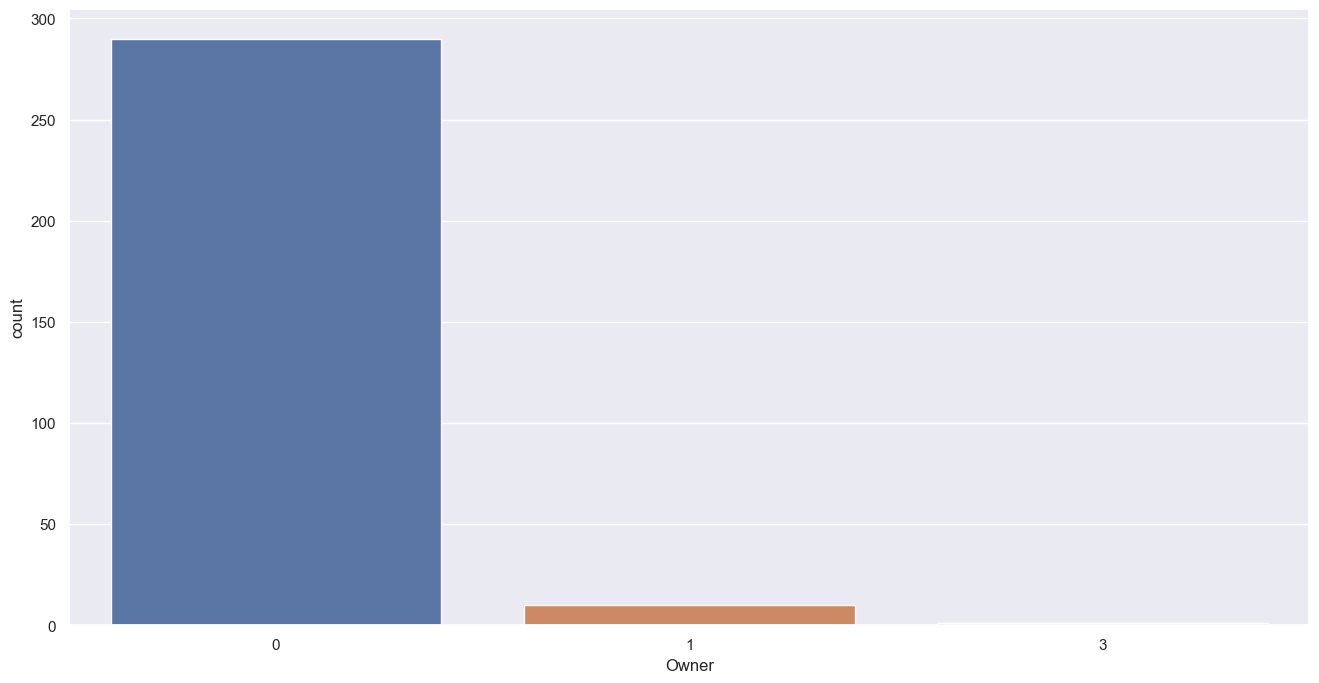

In [51]:
sns.countplot(x='Owner', data=df)
plt.show()

In [52]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

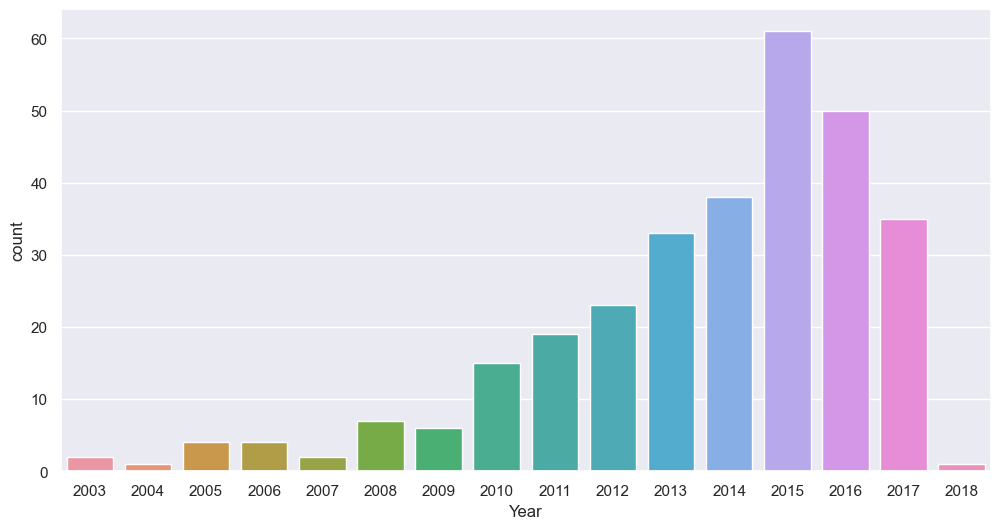

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.show()

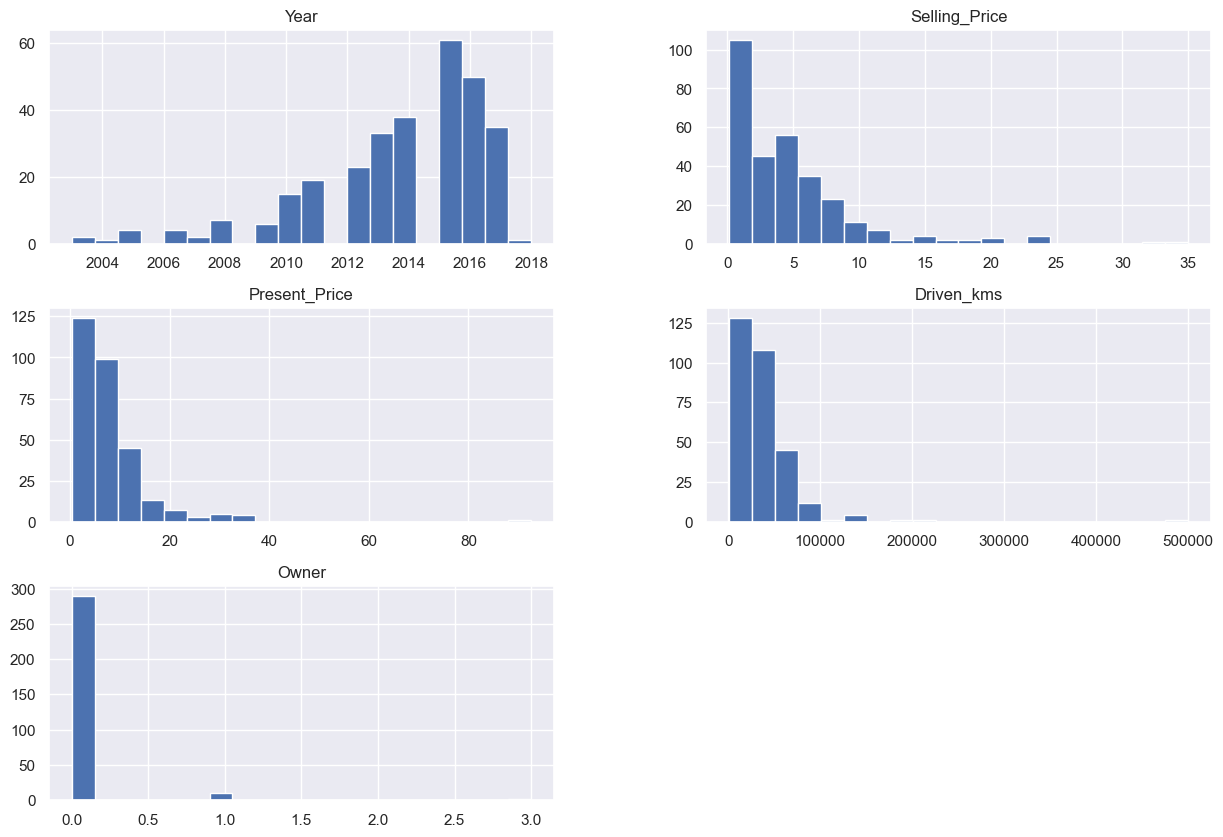

In [54]:
#Exploring Numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

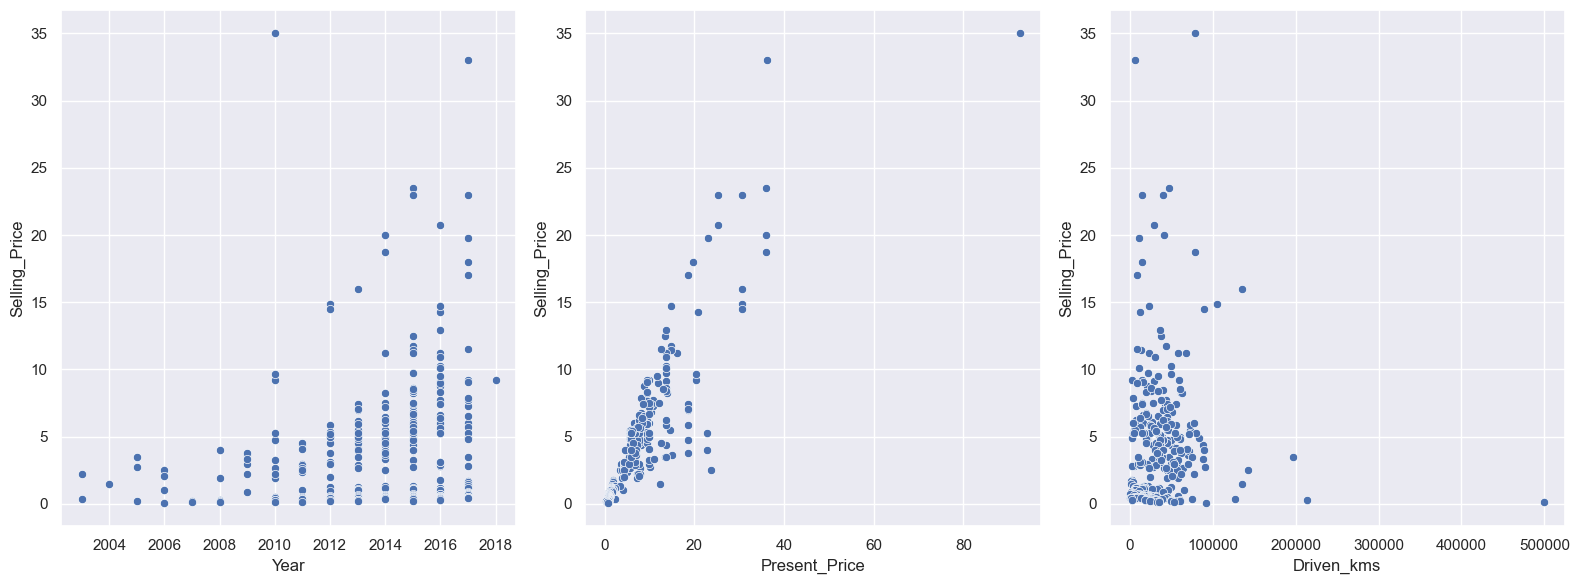

In [55]:
#Finding relationships between different numerical features and our target features
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.tight_layout()
plt.show()

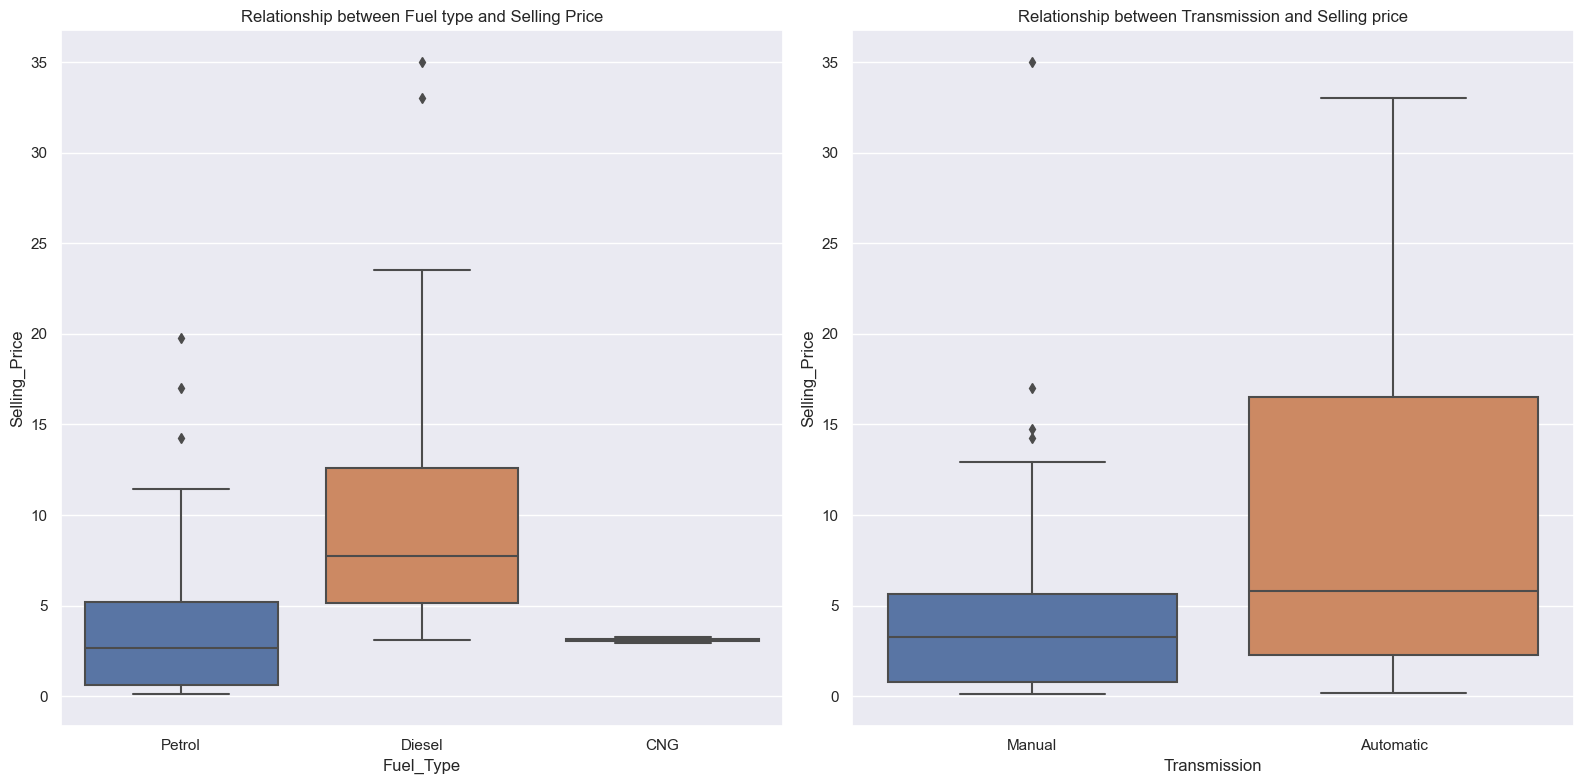

In [56]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()

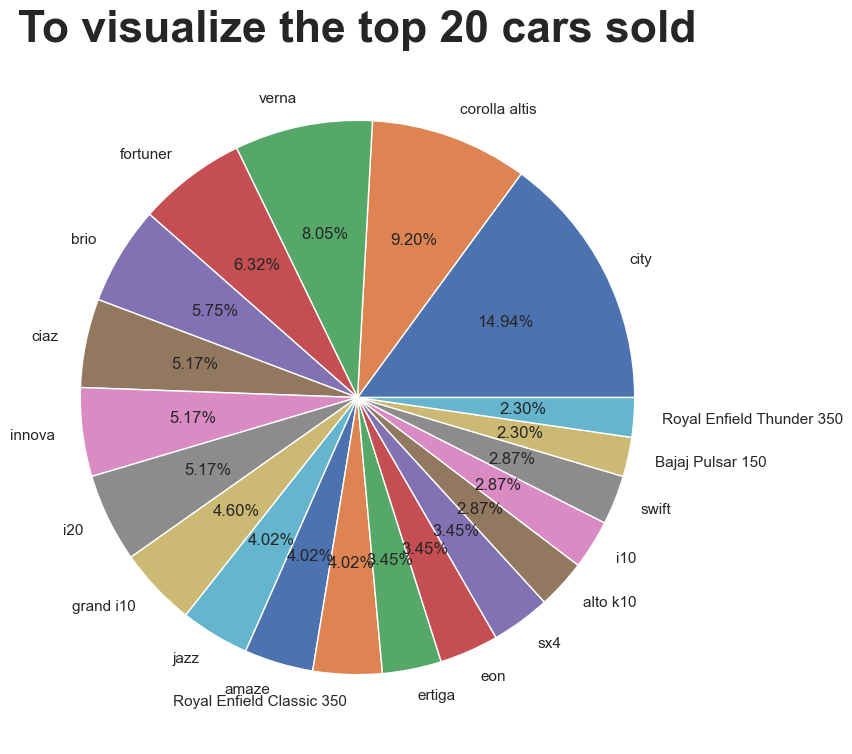

In [57]:
#Let's visualize the car names in the dataset
car_names=df['Car_Name'].value_counts()
#To visualize the top 20 car's sold
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(16,9))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title("To visualize the top 20 cars sold",fontsize=32,fontweight='bold')
plt.show()

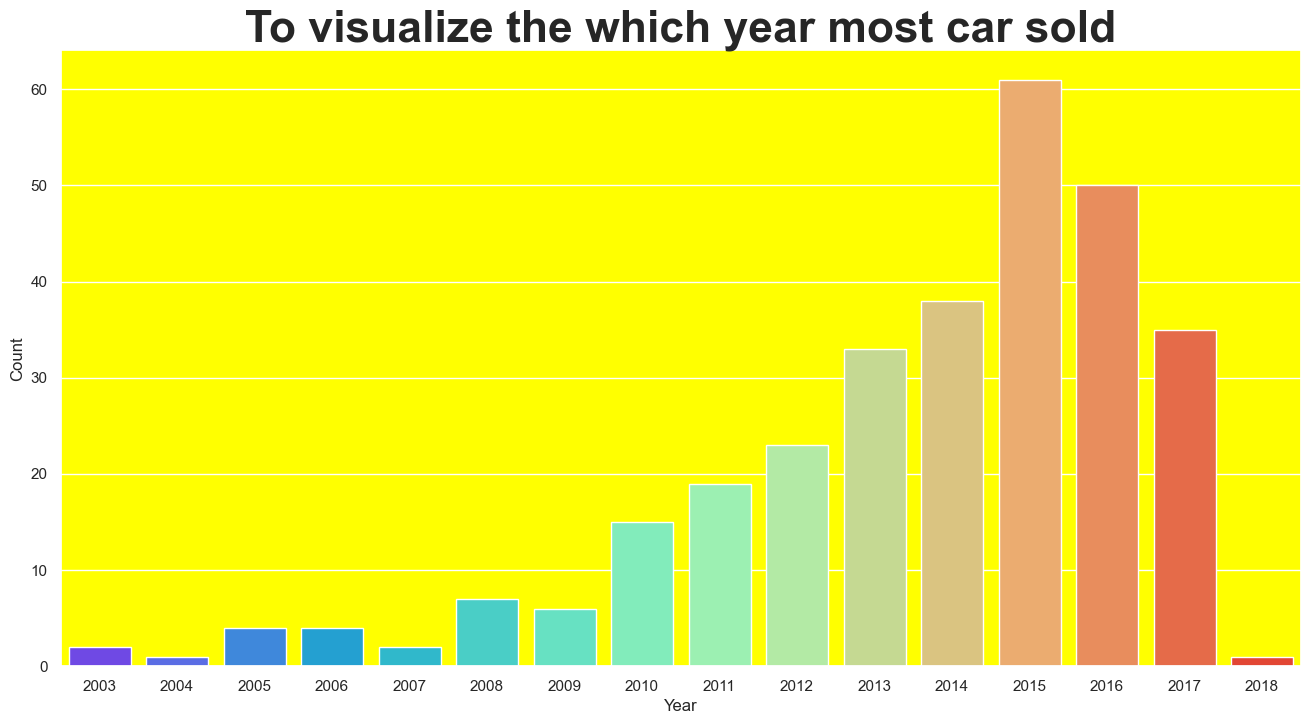

In [58]:
#To visualize the year in the dataset
year=df['Year'].value_counts()
#to visualize the year in the seaborn barplot
ax=plt.axes()
#set the background color
ax.set(facecolor='yellow')
#set the figures size 
sns.set(rc={'figure.figsize':(16,8)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the which year most car sold",fontsize=32,fontweight=900)
#let's visualize the barplot
sns.barplot(x=year.index,y=year,palette='rainbow')
#on the x axis
plt.xlabel("Year")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()

# Model buliding

## Labelencoder

In [59]:
#Let's import the labelencoder covert the categorical data to numerical
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
df['Car_Name']=label.fit_transform(df['Car_Name'])
df['Fuel_Type']=label.fit_transform(df['Fuel_Type'])
df['Selling_type']=label.fit_transform(df['Selling_type'])
df['Transmission']=label.fit_transform(df['Transmission'])

In [60]:
#Let's divided the data into input into target
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [61]:
#normalize the data
scaler=StandardScaler()
#Let's normalize the train dataset
X=scaler.fit_transform(X)

In [64]:
#divided the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# LinearRegression

In [65]:
#Install the Linear regression model
linear=LinearRegression()
#let's fi the train data
linear.fit(X_train,y_train)
#Prediction of the test data
linear_pred=linear.predict(X_test)

In [66]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {linear.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 87.50
The Train_accuracy: 87.75


In [67]:
#Linear regression mean_squared_error and r2_score
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LinearRegression {:.4f}".format(rmse))
print("R2_score LinearRegression {:4f}".format(r2_score(y_test,linear_pred)))
print("mean_absolute_error LinearRegression {:4f}".format(mean_absolute_error(y_test,linear_pred)))

Root_mean_squred_error LinearRegression 1.8531
R2_score LinearRegression 0.875005
mean_absolute_error LinearRegression 1.233813


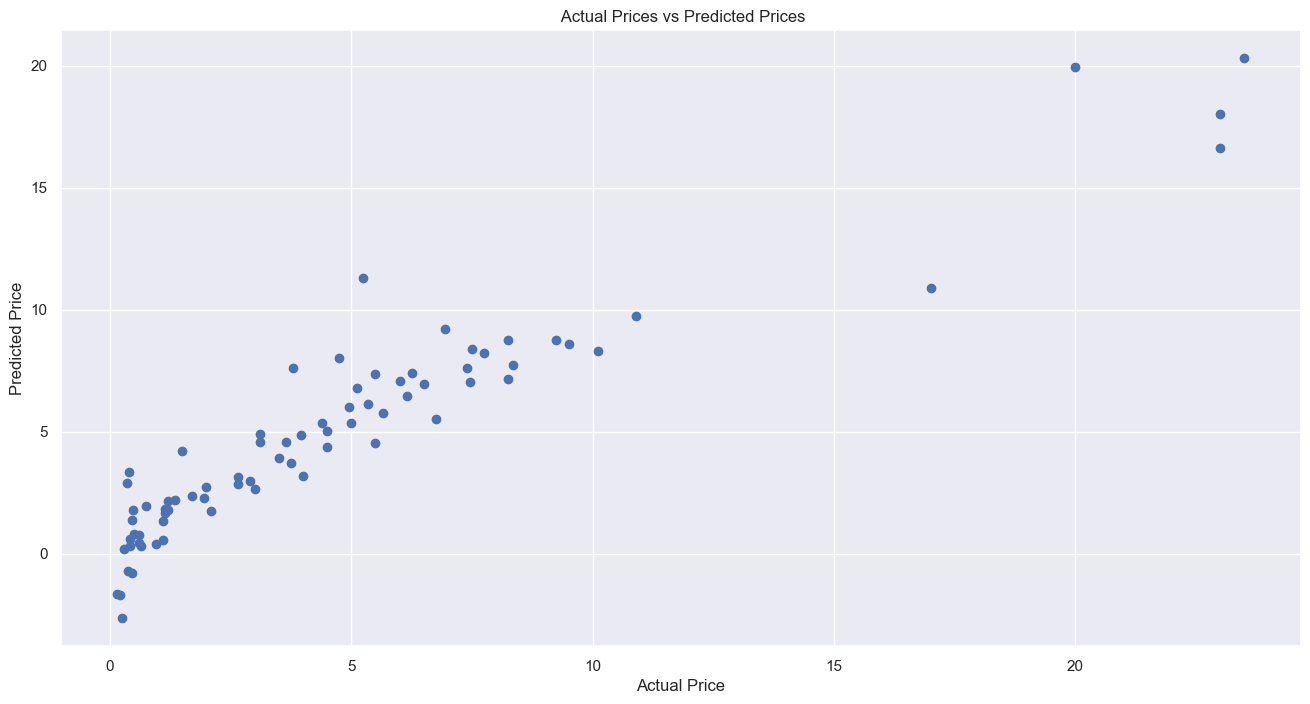

In [68]:
plt.scatter(y_test, linear_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# DecisionTreeRegressor

In [69]:
#Install the decisiontreeregressor from sklearn
from sklearn.tree import DecisionTreeRegressor
#install the model
tree=DecisionTreeRegressor(random_state=0)
#and fit the train data to the model
tree.fit(X_train,y_train)
#Prediction of the test dataset
tree_pred=tree.predict(X_test)

In [70]:
#Check the test score and train score to the DecisionTreeRegressor algorithm
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 96.04
The Train_accuracy: 100.00


In [71]:
#DecisionTreeRegressor mean_squared_error , r2_score
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error DecisionTreeRegressor {:.4f}".format(rmse))
print("R2_score DecisionTreeRegressor {:4f}".format(r2_score(y_test,tree_pred)))
print("mean_absolute_error DecisionTreeRegressor {:4f}".format(mean_absolute_error(y_test,tree_pred)))

Root_mean_squred_error DecisionTreeRegressor 1.0429
R2_score DecisionTreeRegressor 0.960416
mean_absolute_error DecisionTreeRegressor 0.641053


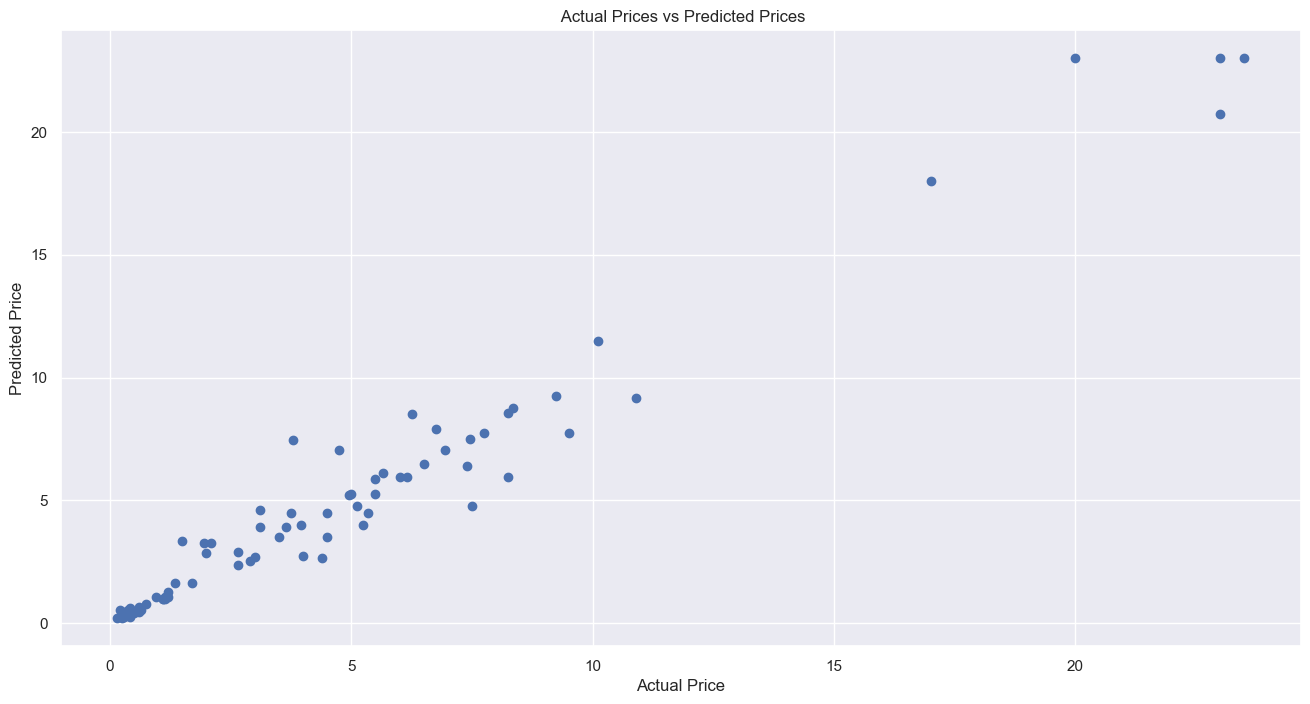

In [72]:
plt.scatter(y_test, tree_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# RandomForestRegressor

In [73]:
#Install the RandomForestRegressor model to the sklearn
from sklearn.ensemble import RandomForestRegressor
#install the RandomForestRegressor
random=RandomForestRegressor()
#Let's fit the train data to the model
random.fit(X_train,y_train)
#Prediction to the test dataset
random_pred=random.predict(X_test)

In [74]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 96.53
The Train_accuracy: 98.52


In [75]:
#RandomForestRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,random_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error RandomForestRegressor {:.4f}".format(rmse))
print("R2_score RandomForestRegressor {:4f}".format(r2_score(y_test,random_pred)))
print("mean_absolute_error RandomForestRegressor {:4f}".format(mean_absolute_error(y_test,random_pred)))

Root_mean_squred_error RandomForestRegressor 0.9766
R2_score RandomForestRegressor 0.965288
mean_absolute_error RandomForestRegressor 0.606128


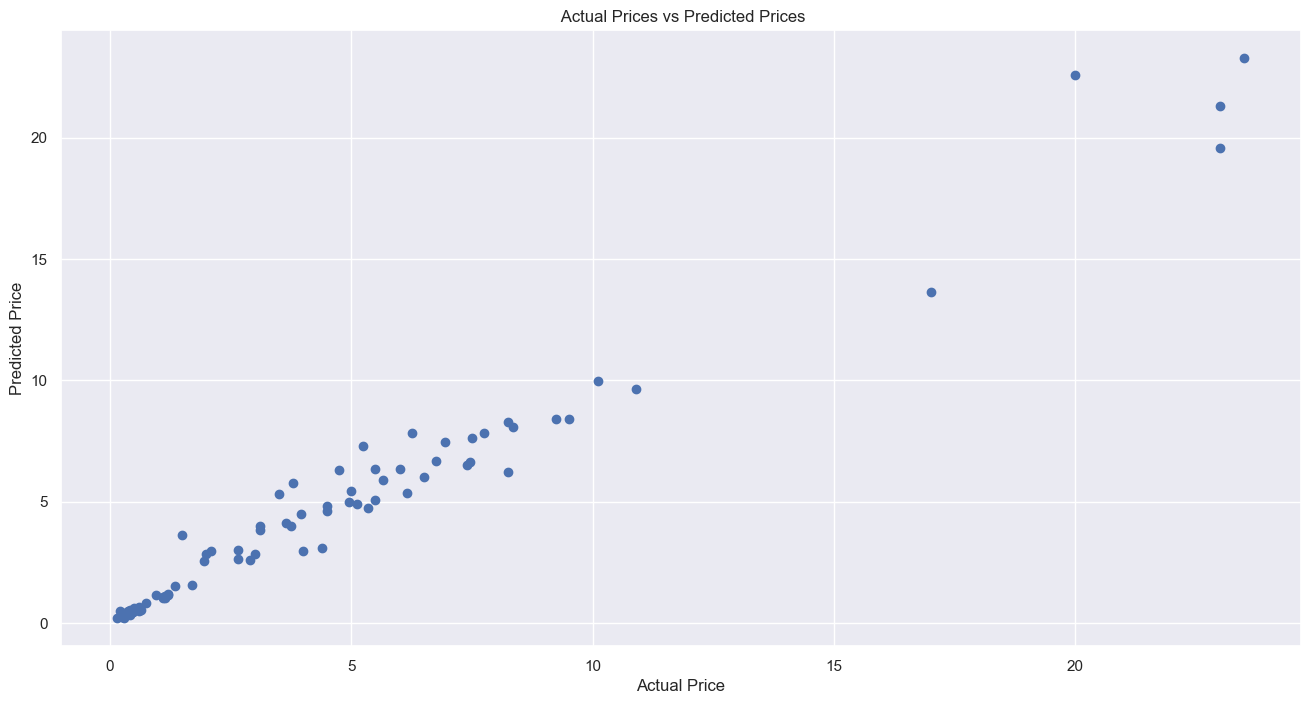

In [76]:
plt.scatter(y_test, random_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# XGBRegressor

In [77]:
#Install the XGBRegressor from the xgboost
from xgboost import XGBRegressor
#Install the XGBRegressor
xgb=XGBRegressor()
#And fit the train data to the model
xgb.fit(X_train,y_train)
#Prediction of the XGBRegressor
xgb_pred=xgb.predict(X_test)

In [78]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 97.25
The Train_accuracy: 100.00


In [79]:
#XGBRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,xgb_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error XGBRegressor {:.4f}".format(rmse))
print("R2_score XGBRegressor {:4f}".format(r2_score(y_test,xgb_pred)))
print("mean_absolute_error XGBRegressor {:4f}".format(mean_absolute_error(y_test,xgb_pred)))

Root_mean_squred_error XGBRegressor 0.8698
R2_score XGBRegressor 0.972461
mean_absolute_error XGBRegressor 0.529474


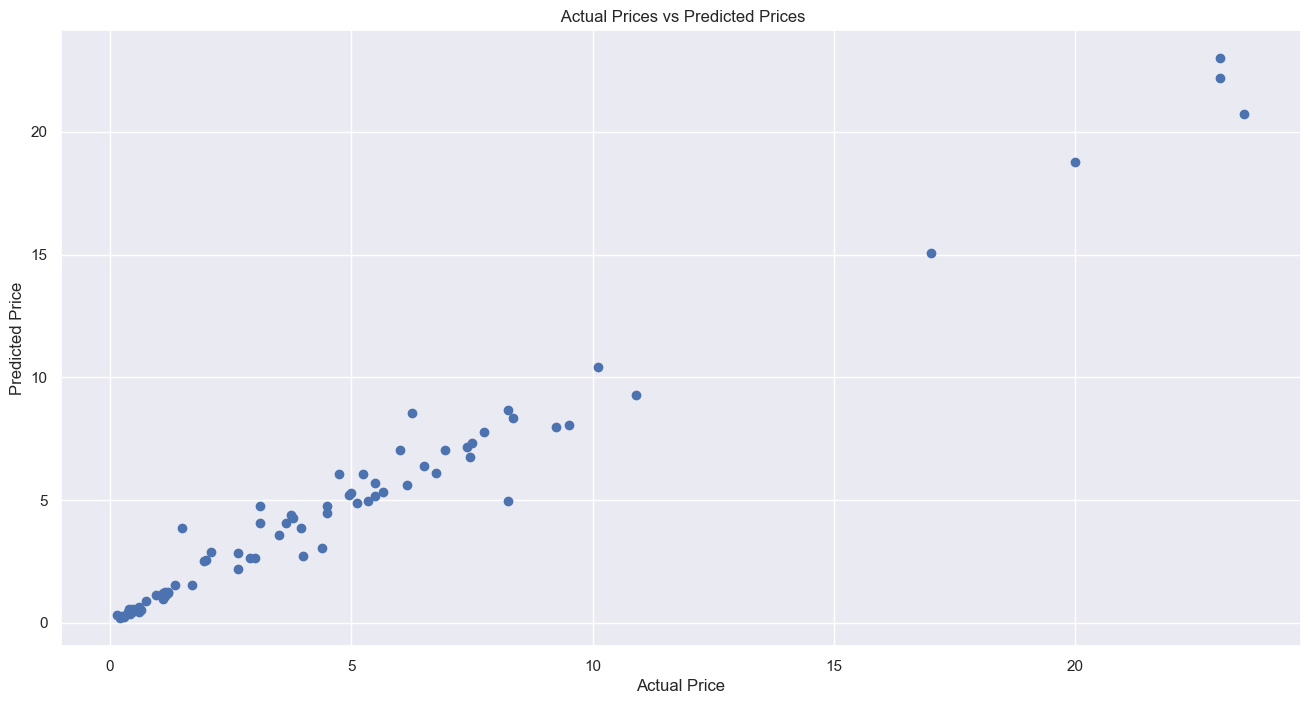

In [80]:
plt.scatter(y_test, xgb_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()